<a href="https://colab.research.google.com/github/NAVEED261/MY-AI-ASSISTANT/blob/main/command_3_agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
%%capture no-stderr
%pip install langgraph langchain_google_genai

In [118]:
import os
from google.colab import userdata

# Retrieve API key from userdata
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')

# Set the environment variable correctly
os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY
# Import and use the LLM
from langchain_google_genai import ChatGoogleGenerativeAI

# Change the model name to the correct format: models/gemini-1.5-pro
llm: ChatGoogleGenerativeAI = ChatGoogleGenerativeAI(model="models/gemini-1.5-pro")
llm.invoke("hi")

AIMessage(content='Hi there! How can I help you today?', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-177110b7-b7a5-4d3a-b716-a0155cad12d6-0', usage_metadata={'input_tokens': 2, 'output_tokens': 11, 'total_tokens': 13, 'input_token_details': {'cache_read': 0}})

In [119]:
from typing import Annotated, TypedDict,Optional,Literal
from langgraph.graph import StateGraph, START
from langgraph.graph.state import CompiledStateGraph
from langgraph.graph.message import add_messages
from langgraph.types import Command
from langchain_core.messages import HumanMessage  , AIMessage
from IPython.display import Image
import random

In [120]:
class state(TypedDict):
  address: str
  nearby_home:Optional[list[dict]]
  messages:Annotated[list,add_messages]

In [121]:
def node_A(state:state)->Command[Literal["search_by_near_home","question_answer"]]:
  print("call to node_A")

  value = random.choices(["search_by_near_home","question_answer"])
  if value == "search_by_near_home":
    goto =    "search_by_near_home"
  else:
    goto =      "question_answer"
  return Command (
      goto = goto
  )

def search_by_near_home(state:state):
  print("call to search_by_near_home")
  return{"nearby_home":[{"home_1":"fatima zehra"},{"home_2":"umaima gul"}]}

def question_answer(state:state):
  print("question_answer")
  return{"messages":[AIMessage(content="system is down due to internet problem try again letter")]}

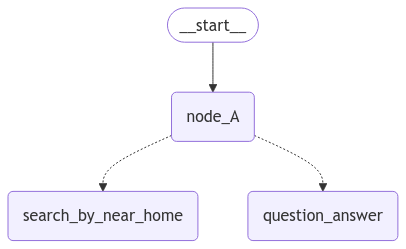

In [122]:
builder = StateGraph(state)
builder.add_edge(START, "node_A")
builder.add_node(node_A)
builder.add_node(search_by_near_home)
builder.add_node(question_answer)
# NOTE: there are no edges between nodes A, B and C!

graph = builder.compile()


from IPython.display import display, Image

display(Image(graph.get_graph().draw_mermaid_png()))

In [123]:
response = graph.invoke({"address":"karachi"})
print('\n[finalresposne]', response)

call to node_A
question_answer

[finalresposne] {'address': 'karachi', 'messages': [AIMessage(content='system is down due to internet problem try again letter', additional_kwargs={}, response_metadata={}, id='1359df3c-ce60-4a35-84ac-8a8d9f7845cf')]}


In [124]:
class state(TypedDict):
  address: str
  nearby_home:Optional[list[dict]]
  messages:Annotated[list,add_messages]
  user_data:Optional[dict]

In [125]:
def node_A(state:state)->Command[Literal["search_by_near_home","question_answer"]]:
  print("call to node_A")

  fetching_data ={"name":"Hafiz Naveed uddin"}

  value = random.choices(["search_by_near_home","question_answer"])
  if value == "search_by_near_home":
    goto =    "search_by_near_home"
  else:
    goto =      "question_answer"

  return Command(
      update={"user_data": fetching_data},
      goto = goto
  )

def search_by_near_home(state:state):
  print("call to search_by_near_home")
  print("user_info",state["user_data"])
  return{"nearby_home":[{"home_1":"fatima zehra"},{"home_2":"umaima gul"}]}

def question_answer(state:state):
  print("question_answer")
  print("user_info",state["user_data"])
  user_name = state["user_data"].get("name","guest")
  return {"messages": [AIMessage(content=f"Hi, {user_name} Welcome to Homes AI Search Engine")]}

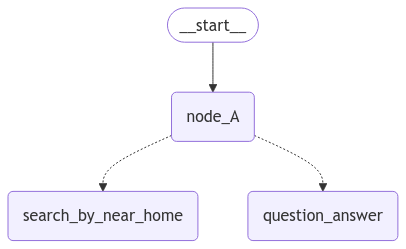

In [126]:
builder = StateGraph(state)
builder.add_edge(START, "node_A")
builder.add_node(node_A)
builder.add_node(search_by_near_home)
builder.add_node(question_answer)
# NOTE: there are no edges between nodes A, B and C!

graph = builder.compile()


from IPython.display import display, Image

display(Image(graph.get_graph().draw_mermaid_png()))

In [127]:
response = graph.invoke({"address":"karachi"})
print('\n[finalresposne]', response)

call to node_A
question_answer
user_info {'name': 'Hafiz Naveed uddin'}

[finalresposne] {'address': 'karachi', 'messages': [AIMessage(content='Hi, Hafiz Naveed uddin Welcome to Homes AI Search Engine', additional_kwargs={}, response_metadata={}, id='be1fcb09-5f85-4950-9156-f4a153b43a9d')], 'user_data': {'name': 'Hafiz Naveed uddin'}}


In [128]:
class state(TypedDict):
  address: str
  nearby_home:Optional[list[dict]]
  messages:Annotated[list,add_messages]
  user_data:Optional[dict]

In [129]:
def node_A(state:state)->Command[Literal["search_by_near_home","question_answer"]]:
  print("call to node_A")

  fetching_data ={"name":"Hafiz Naveed uddin"}

  value = random.choices(["search_by_near_home","question_answer"])
  if value == "search_by_near_home":
    goto =    "search_by_near_home"
  else:
    goto =      "question_answer"

  return Command(
      update={"user_data": fetching_data},
      goto = ["search_by_near_home","question_answer"]
  )

def search_by_near_home(state:state):
  print("call to search_by_near_home")
  print("user_info",state["user_data"])
  return{"nearby_home":[{"home_1":"fatima zehra"},{"home_2":"umaima gul"}]}

def question_answer(state:state):
  print("called to question_answer")
  print("user_info",state["user_data"])
  user_name = state["user_data"].get("name","guest")
  return {"messages": [AIMessage(content=f"Hi, {user_name} Welcome to Homes AI Search Engine")]}

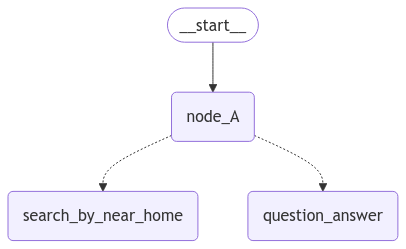

In [130]:
builder = StateGraph(state)
builder.add_edge(START, "node_A")
builder.add_node(node_A)
builder.add_node(search_by_near_home)
builder.add_node(question_answer)
# NOTE: there are no edges between nodes A, B and C!

graph = builder.compile()


from IPython.display import display, Image

display(Image(graph.get_graph().draw_mermaid_png()))

In [131]:
response = graph.invoke({"address":"karachi"})
print('\n[finalresposne]', response)

call to node_A
call to search_by_near_home
user_info {'name': 'Hafiz Naveed uddin'}
called to question_answer
user_info {'name': 'Hafiz Naveed uddin'}

[finalresposne] {'address': 'karachi', 'nearby_home': [{'home_1': 'fatima zehra'}, {'home_2': 'umaima gul'}], 'messages': [AIMessage(content='Hi, Hafiz Naveed uddin Welcome to Homes AI Search Engine', additional_kwargs={}, response_metadata={}, id='b7105b8b-c771-477d-af39-8ca373725653')], 'user_data': {'name': 'Hafiz Naveed uddin'}}


In [132]:
class state(TypedDict):
  address: str
  nearby_home:Optional[list[dict]]
  messages:Annotated[list,add_messages]
  user_data:Optional[dict]
  agent_recommendation: Optional[str]

In [133]:
def node_A(state:state)->Command[Literal["search_by_near_home","question_answer","realstate_agent"]]:
  print("call to node_A")

  fetching_data ={"name":"Hafiz Naveed uddin"}

  value = random.choices(["search_by_near_home","question_answer","realstate_agent"])
  if value == "search_by_near_home":
    goto =    "search_by_near_home"
  else:
    goto =      "question_answer"

  return Command(
      update={"user_data": fetching_data},
      goto = ["search_by_near_home","question_answer","realstate_agent"]
  )

def search_by_near_home(state:state):
  print("call to search_by_near_home")
  print("user_info",state["user_data"])
  return{"nearby_home":[{"home_1":"fatima zehra"},{"home_2":"umaima gul"}]}

def question_answer(state:state):
  print("called to question_answer")
  print("user_info",state["user_data"])
  user_name = state["user_data"].get("name","guest")
  return {"messages": [AIMessage(content=f"Hi, {user_name} Welcome to Homes AI Search Engine")]}
def realstate_agent(state: state):
    """
    This node might talk like a real estate agent,
    analyze user data, or do any advanced logic.
    We'll just do a simple example.
    """
    print("Call to realstate_agent!")
    print("user_info",state["user_data"])
    user_name = state["user_data"].get("name","guest")

    recommendation = (
        f"Hello {user_name}, based on your budget and address '{state['address']}', "
        "I recommend checking out the newly listed 2-bedroom apartment in your area."
    )

    # We'll store it in the new key 'agent_recommendation'
    return {"agent_recommendation": recommendation}

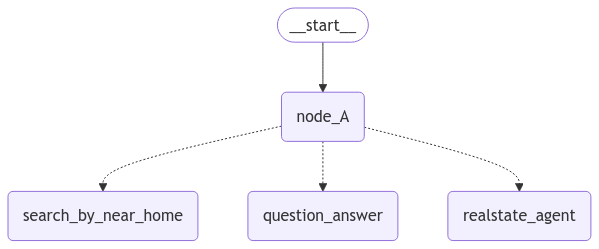

In [134]:
builder = StateGraph(state)
builder.add_edge(START, "node_A")
builder.add_node(node_A)
builder.add_node(search_by_near_home)
builder.add_node(question_answer)
builder.add_node(realstate_agent)
# NOTE: there are no edges between nodes A, B and C!

graph = builder.compile()


from IPython.display import display, Image

display(Image(graph.get_graph().draw_mermaid_png()))

In [135]:
response = graph.invoke({"address":"karachi"})
print('\n[finalresposne]', response)

call to node_A
call to search_by_near_home
user_info {'name': 'Hafiz Naveed uddin'}
called to question_answer
Call to realstate_agent!
user_info {'name': 'Hafiz Naveed uddin'}
user_info {'name': 'Hafiz Naveed uddin'}

[finalresposne] {'address': 'karachi', 'nearby_home': [{'home_1': 'fatima zehra'}, {'home_2': 'umaima gul'}], 'messages': [AIMessage(content='Hi, Hafiz Naveed uddin Welcome to Homes AI Search Engine', additional_kwargs={}, response_metadata={}, id='530f14b0-2adf-471b-911b-48d6c55def17')], 'user_data': {'name': 'Hafiz Naveed uddin'}, 'agent_recommendation': "Hello Hafiz Naveed uddin, based on your budget and address 'karachi', I recommend checking out the newly listed 2-bedroom apartment in your area."}
